In [13]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import inv
import pandas as pd
from sklearn import linear_model
import math
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

np.random.seed(5)

In [14]:
data_folder = './data/'

In [15]:
def ridge_regression(X,y, lambda_val):
    '''Naive implementation of ridge regression that illustrated the introduction of the regularization term'''
    X_t = np.transpose(X) #X^T
    X_t_X = X_t.dot(X)    #X^TX
    
    reg_term = lambda_val*np.identity(len(X_t_X))    

    X_inv = inv(X_t_X + reg_term)    #(#X^TX + lambda*I)^-1
    X_T_y = X_t.dot(y)    #X^Ty
    w = linalg.solve(X_t_X + reg_term, X_T_y)
    return w

In [16]:
ds = pd.read_csv(data_folder + 'olympics_100m.csv', sep=',')

#Splitting traing/test
training = ds[0:len(ds)-2]
testing=ds[-2:]

In [17]:
#Let's use the notation from the lecture
X = training.loc[:,'Year'].values
y = training.loc[:, 'Time'].values
X = X.reshape(len(training),1)

X_test = testing.loc[:,'Year'].values
y_test = testing.loc[:, 'Time'].values
X_test = X_test.reshape(len(testing),1)

power = 7
poly = PolynomialFeatures(power)
X_train = poly.fit_transform(X)

scaler = StandardScaler(copy=True)
scaler.fit(X_train[:,1:])
X_train[:,1:] = scaler.transform(X_train[:,1:])

X_test_poly =  poly.fit_transform(X_test)
scaled_test = X_test_poly
X_test_poly[:,1:] = scaler.transform(X_test_poly[:,1:])

alpha: 0 gives W: [-7.35530747e-09  7.12849843e+04 -1.71460545e+06  4.64330871e+06
 -2.91062977e+06 -3.05490659e+06  4.41375035e+06 -1.44820276e+06]
alpha: 1e-05 gives W: [ 4.50905944e-16 -4.11498118e+01 -8.99905537e-01  2.32795512e+01
  3.15181252e+01  2.39574392e+01  7.50942188e-01 -3.79363466e+01]
alpha: 0.002 gives W: [-4.66498851e-16 -1.73507591e+00 -9.97927927e-01 -3.69725207e-01
  1.50016308e-01  5.61866710e-01  8.66481144e-01  1.06459864e+00]
alpha: 0.05 gives W: [-4.51061544e-16 -7.79251911e-01 -5.34277344e-01 -2.93511369e-01
 -5.70108294e-02  1.75170822e-01  4.02983604e-01  6.26381070e-01]
alpha: 0.1 gives W: [-4.43138216e-16 -5.33876150e-01 -3.74265676e-01 -2.16731203e-01
 -6.13142840e-02  9.19452170e-02  2.43009178e-01  3.91841276e-01]
alpha: 1 gives W: [-4.16716051e-16 -1.30621767e-01 -1.08510109e-01 -8.65980794e-02
 -6.48920071e-02 -4.33980570e-02 -2.21222209e-02 -1.07030941e-03]


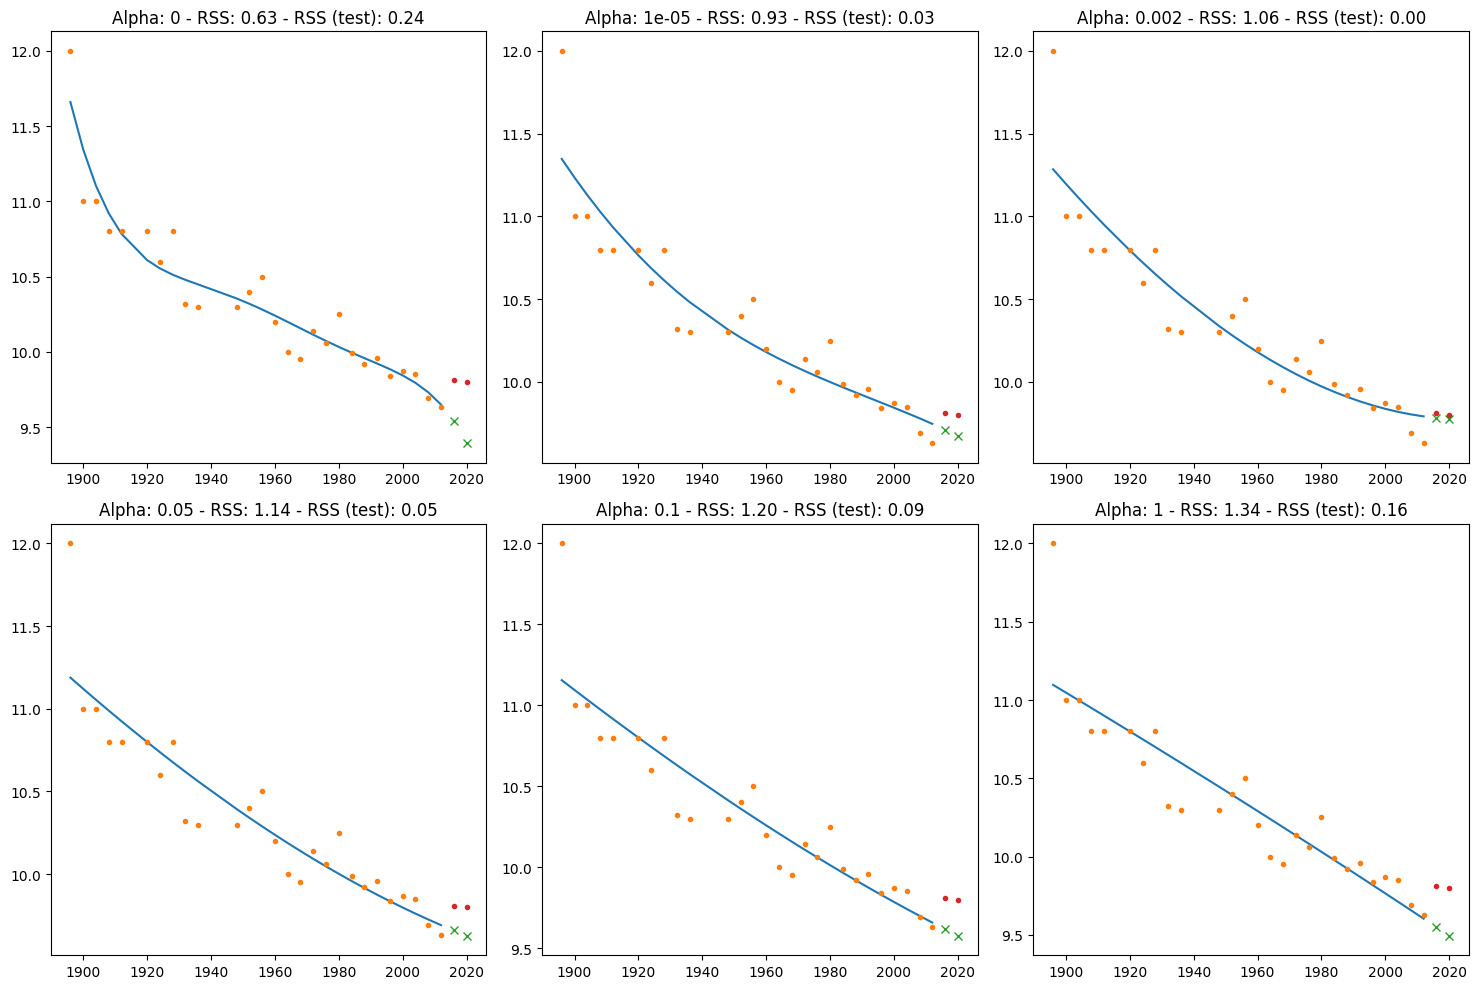

In [18]:
plt.rcParams['figure.figsize'] = [15, 10]
alphas = [0, 0.00001, 0.002, 0.05, 0.1, 1]
for count, degree in enumerate(alphas):
    w = ridge_regression(X_train,y-y.mean(),degree)
#     X_plot = poly.fit_transform(x_plot.reshape(-1,1))
    y_hat = np.sum(X_train*w,axis=1)+y.mean()
    print('alpha: '+ str(degree) + ' gives W: ' + str(w))
    plt.subplot(231+count) #Non-elegant way to assign spaces in the subplot
    plt.tight_layout()
    plt.plot(np.transpose(X[:,0]),y_hat)
    plt.plot(X[:,0],y,'.')
    y_hat_test = np.sum(X_test_poly*w,axis=1)+y.mean()
       
    plt.plot(X_test[:,0],y_hat_test,'x')
    plt.plot(X_test[:,0],y_test,'.')
     
    plt.title('Alpha: ' + str(degree) + ' - RSS: ' + '{:.2f}'.format((sum((y - y_hat)*(y - y_hat))))
              + ' - RSS (test): ' + '{:.2f}'.format(sum((y_test - y_hat_test)*(y_test - y_hat_test))))